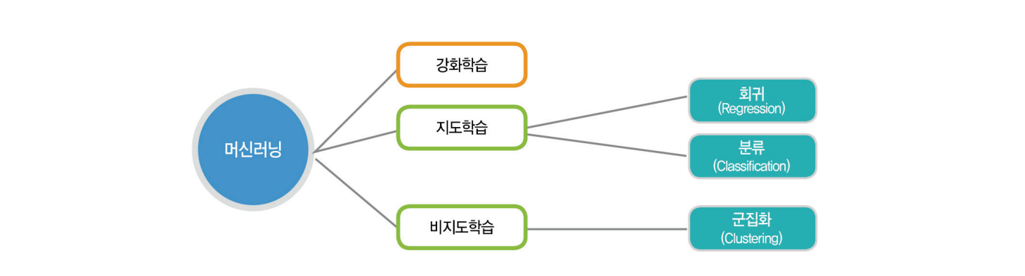

# 군집(Clustering)

* 군집(Clustering)은 특징이 비슷한 데이터들끼리 그룹핑해주는 머신러닝 기법을 총칭합니다. 
* 비지도학습(Unsupervised Learning)에 해당합니다. 
* 레이블이 없는 데이터를 분류하는 머신러닝 기법입니다. 
* 주요 클러스터링 알고리즘
    * KMeans, DBSCAN, Hierarchical Clustering 등이 있습니다. 
    * 이 중에서 가장 기본적이면서도, 최근까지 사용되는 알고리즘이 KMeans알고리즘입니다. 

* 군집화 활용 분야
    * 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
    * Image 검출, 세분화
    * 이상 검출(abnomaly detection)


**정답도 없는데 어떻게 군집(유사성)을 정의할 것인가?**


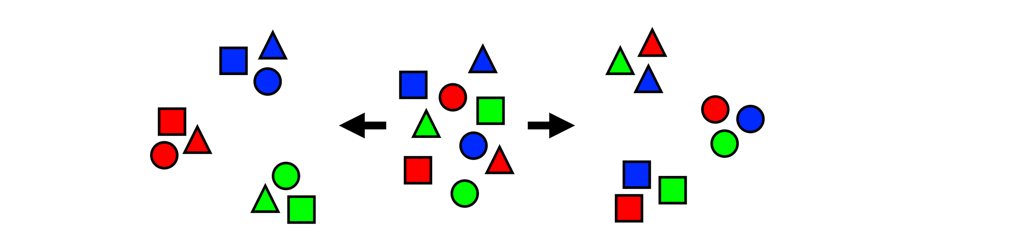

## K-Means

* 군집 중심점(Centroid)기반 클러스터링입니다. 
* KMeans 알고리즘 동작 방식
    1. k값 결정(얼마나 많은 클러스터가 필요한지를 결정)
    2. 초기 Centroid결정 -----------------검은 점과 거리를 계산함
    3. 모든 데이터를 순회하며, 각 데이터마다 가장 가까운 Centroid를 찾아서 해당 클러스터에 할당-----평균점으로 이동함.a와 b사이
    4. 모든 데이터를 순회한 후, Centroid를 각 클러스터의 중심으로 이동
    5. 각 클러스터에 재할당되는 데이터가 없을 때까지 3과 4를 반복


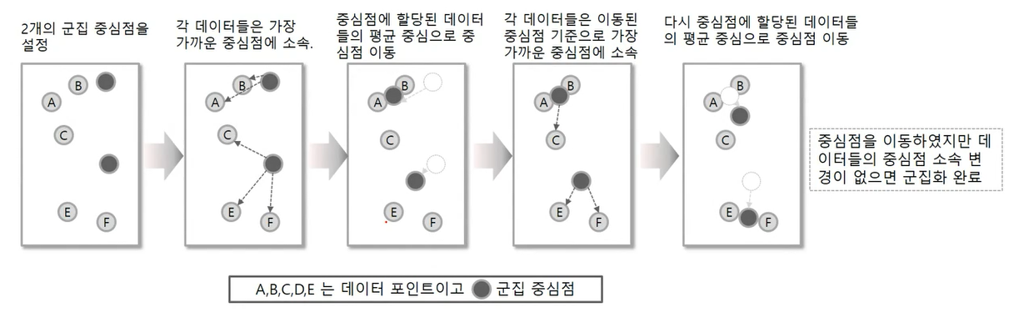

<center>
<img src="https://miro.medium.com/max/832/1*O6_nsE3nLwPw1thqaGmTYA.gif" width="400" height="300"  />
</center>

    
* 장점
    * 알고리즘이 간결하고 쉽습니다. 
    * 일반적인 군집화에서 가장 많이 활용되는 알고리즘입니다. 
* 단점
    * K를 미리 정해줘야함.
    * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어집니다. 
    * 이를 위해 PCA로 차원 축소를 적용해야 할 수도 있습니다. 
    * 반복을 수행하는데, 반복횟수가 많을 경우 수행 시간이 느려집니다. 
    * 이상치(Outlier)데이터에 취약합니다.  ------- 멀리있는 새로운점이 있다 하면 , 그 멀리있는 점도 평균을 내기때문에/
    *                                                                           ㄴ 전처리가 중요하다

## 평가 지표

* 비지도 학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵습니다.
* **inertia value** 
    * 군집화된 후, 각 Centroid에서 군집된 데이터 간의 거리를 합산한 값으로 응집도를 수치화 한 것입니다.
    * 낮을 수록 좋음
* 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 **실루엣 분석**을 이용한다.


### 실루엣 분석

* 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냅니다. 
* 개별 데이터가 가지는 군집화 지표인 실루엣 계수(Sillhouette coefficient)를 기반으로 합니다. 
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고,
* 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표입니다. 
* 사이킷런에서 실루엣 평가 클래스를 지원합니다. (sklearn.metrics.silhouette_score())
* 전체 실루엣 계수의 평균값을 나타내며, 0~ 1사이의 값을 가지며, 1에 가까울수록 좋습니다. 
* 개별 군집의 평균값의 편차가 크지 않아야 합니다.(개별 군집들이 고르게 평균값에 위치해야함.)


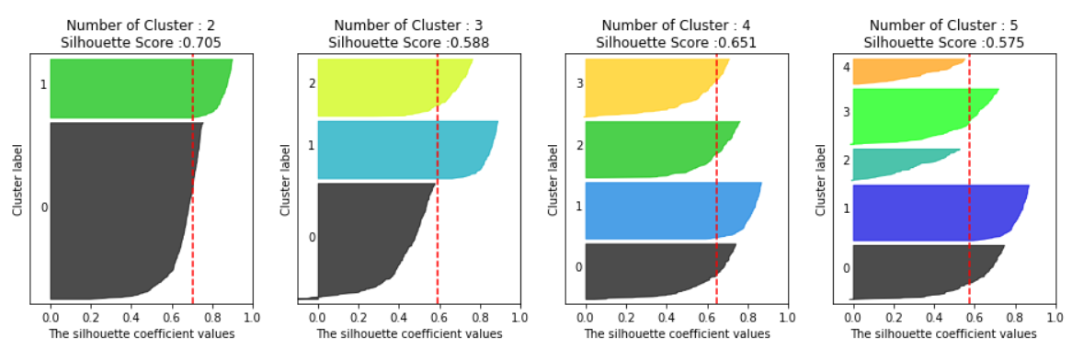

<div class="alert alert-block">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
cluster 2가 실루엣 스코어는 제일 높다. 하지만 0번 클러스터의 양이 상대적으로 너무 많아 덜 군집화된 느낌이다. 3개로 나눠볼까<br>
cluster 3는 0클러스터가 상대적으로 양이 많다. 클러스터간 평균값의 편차가 있다.(=군집간의 차이가 크다. 쳥균에 못미치는 데이터가 많다.) <br>
cluster 4는 클러스터 개별의 사이즈가 비슷하고 스코어도 높아서 좋다. 빨간색 평균선을 각 클러스터들이 모두 고르게 넘었다. <br>
cluster 5는 클러스터 개별 사이즈가 제각각이고, 평균에 못 미치는 클러스터도 생긴다.<br>
실루엣 스코어만 보면 cluster 2의 경우가 가장 좋아 보이지만, 시각화를 통해 살펴보면 cluster 4가 좋은 것임을 확인할 수 있다. 
</div>  

---

## K-Means실습

## 데이터 로딩

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
#함수와 속성들을 알 수 있는 함수
dir(iris) 

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 모델 학습/예측

In [6]:
# n_clusters 센트로이드 개수
# init : 초기화 위치 알고리즘
kmeans = KMeans(n_clusters=3,random_state=0,verbose=0)
labels = kmeans.fit_predict(irisDF)

labels#클러스터링함.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

0 과 1 과 2 로 분리됨을 알게 됨.

In [6]:
# 클러스터간의 응집도
kmeans.inertia_

78.85144142614602

In [9]:
# irisDF['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)

irisDF['target'] = iris.target#우리가 알고있는 사실
irisDF['cluster']= labels     #kmean결과 - 자체적으로 그루핑하고 번호를 붙혀줌.
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
irisDF.groupby(['target','cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

0 번은  1번으로 클러스터 불순물 없이 그루핑됨

1 번은 0 번으로 클러스터 됬지만 2 개는 2번으로 분류됐다.

2 번은 2번으로 클러스터 됐지만 0 번으로 14개가 분류됐다.

### 군집화 시각화

* 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해서는 2차원으로 차원축소를 해야한다. 
* PCA값으로 각 데이터 차원을 축소해서 시각화합니다. 

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2차원으로

pca_transformed = pca.fit_transform(iris.data) #아이리스 피처4개 넣고

pca_transformed.shape

(150, 2)

In [14]:
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


누가 x 고 누가 y인지 모르겠다..

장점 : 익명성 데이터를 사용할 때 pca를 이용하기도함.

> 4개의 피처로 붓꽃 품종을 설명하는데, 4개의 피쳐를 2개의 피처로 함축하여 설명할 수 있도록 하는 방법을 사용한다. <br>
학습데이터의 크기를 줄여서 학습 시간을 절약하고<br>
다차원 데이터를 3차원 이하의 차원 축소를 통해 시각적으로 보다 쉽게 패턴을 인지할 수 있다. 


In [16]:
pca = PCA(n_components=3) #3차원으로

pca_transformed = pca.fit_transform(iris.data)

pca_transformed.shape

(150, 3)

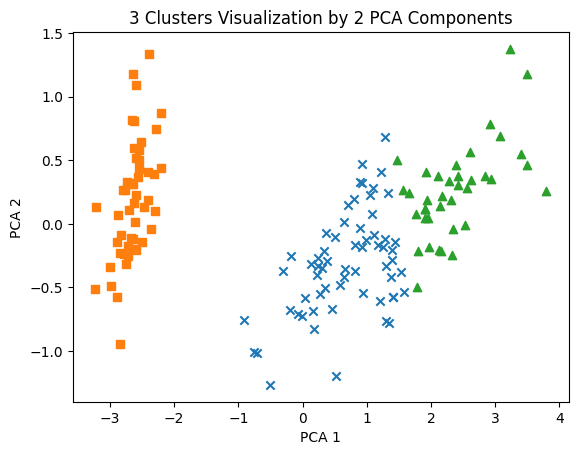

In [13]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. x, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='x') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


주황색은 세토사인것 같다 .데이터가 섞이지않고 순수함.

3차원PCA
http://projector.tensorflow.org/

## 모델 평가

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline



In [14]:
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])

score_samples.shape


(150,)

In [15]:
# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples
irisDF.head(5)

#실루엣 계수는 1에 가까울수록 해당 데이터가 같은 군집 내의 데이터에는 가깝고, 다른 군집과의 거리는 떨어져 있음을 의미

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.849302


In [16]:
#군집중심점에서 다소 떨어져있는 데이터들
irisDF.sort_values(by='silhouette_coeff')

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
114,5.8,2.8,5.1,2.4,2,0,1.585928,-0.539641,0.026359
50,7.0,3.2,4.7,1.4,1,0,1.284826,0.685160,0.026722
134,6.1,2.6,5.6,1.4,2,2,1.781295,-0.499902,0.053286
52,6.9,3.1,4.9,1.5,1,2,1.464302,0.504263,0.053401
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,0.104171
...,...,...,...,...,...,...,...,...,...
39,5.1,3.4,1.5,0.2,0,1,-2.590006,0.229044,0.850332
17,5.1,3.5,1.4,0.3,0,1,-2.648297,0.311849,0.851018
49,5.0,3.3,1.4,0.2,0,1,-2.703360,0.107706,0.852098
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955


In [17]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])

#실루엣 계수의 평균값으로는 높은편이다.
average_score

0.5528190123564095

In [18]:
# 각 클러스터별 실루엣 계수 평균(1:setosa)
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [ ]:
# 각 클러스터별 실루엣 계수 평균
irisDF.groupby('target')['silhouette_coeff'].mean()

target
0    0.798140
1    0.451922
2    0.408394
Name: silhouette_coeff, dtype: float64

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<div class="alert alert-block" style="background-color:#8FBDD3">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
역시 setosa가 군집이 잘 된것을 확인할 수 있다. <br>
</div>  

<AxesSubplot:>

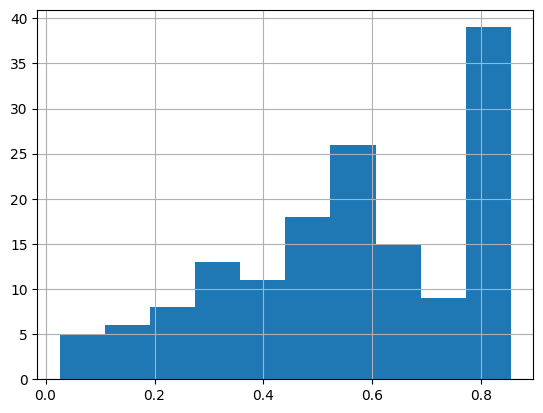

In [20]:
irisDF['silhouette_coeff'].hist()

---

## 심화 

* 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

### 내부함수: 실루엣 시각화

In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

### 붓꽃 데이터

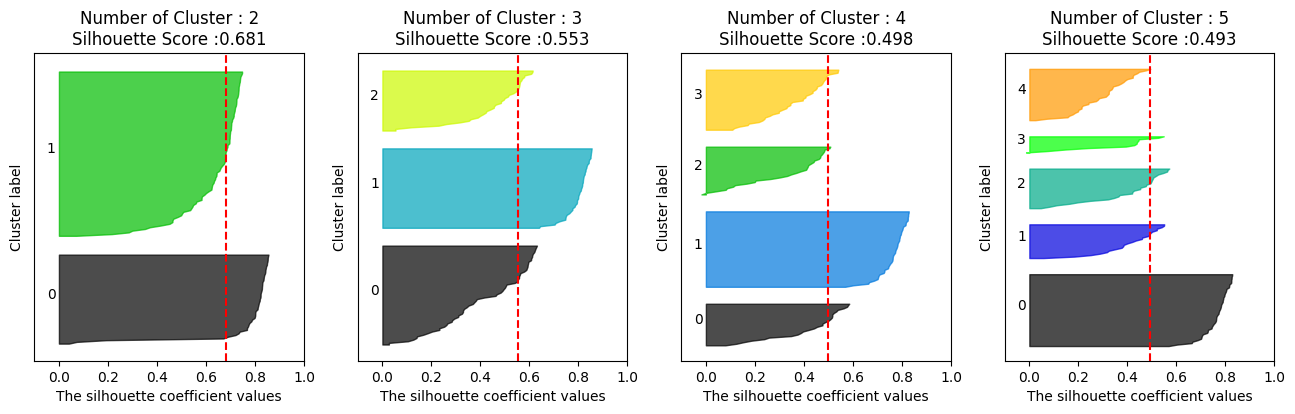

In [18]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

> *     아이리스 데이터는 3개의 품종으로 이루어진 데이터이다.
> *     따라서 2개로 묶어지는지 KMean의 성능을 확인하는 것이 못표이다.
> *     kmean의 결과를 보면 3개로 클러스터링 된 결과가 가장 실루엣 평균이 좋으면서 그룹간의 데이터 양도 균일함을 볼 수 있다.
> * 따라서 kmean은 답이없어 학습이 이루어 지지만 그룹핑을 잘 하는 알고리즘으로 생각된다.

## [참고] 클러스터 중심위치 시각화

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# make_blobs : 다양한 군집 알고리즘을 테스트 하기위해 데이터를 만들어 주는 사이킷런에서 제공하는 유틸리티
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)



(200, 2) (200,)


In [20]:
# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts) #0,1,2 클러스터 생성됨

[0 1 2] [67 67 66]


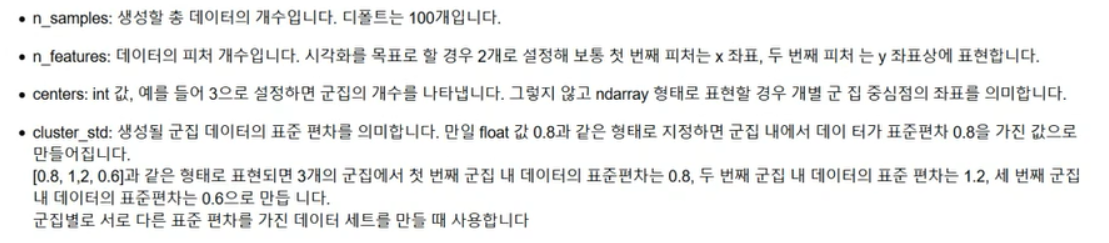

In [21]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


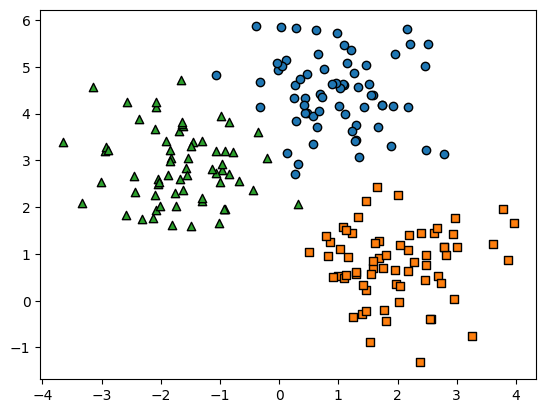

In [22]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

### 시각화

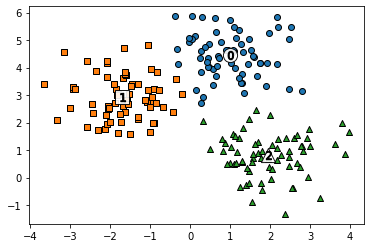

In [29]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
